In [1]:
# 实验
# 利用BMTK（Brain Modeling Toolkit）进行单个精细神经元的神经动力学学习及仿真
'''
    注意：
    如果在设置模拟环境的步骤报错“ERROR:bmtk.utils.sim_setup:  Was unable to compile mechanism in 地址”
    需要在命令行手动输入指令
    因此，若遇到该情况，建议一个cell一个cell地运行程序，不建议使用RUN ALL一步到位
'''

In [2]:
# 先删除原来的配置，以免出现问题
! rm -r sim_ch00

In [3]:
from bmtk.builder.networks import NetworkBuilder

# 实例化网络，取名mcortex
net = NetworkBuilder('mcortex')

# 添加单个节点
net.add_nodes(
    cell_name='Pvalb_469628681',  # 细胞名称
    potential='i',  # 电位：抑制性细胞
    model_type='biophysical',  # 模型类型：生物物理学模型
    model_template='ctdb:Biophys1.hoc',  # 模板文件
    model_processing='aibs_perisomatic',  # 加载模型
    dynamics_params='472363762_fit.json',  # 模型参数文件
    morphology='Pvalb_469628681_m'  # 模型结构文件
)

# 打印
print('Success!')

Success!


In [4]:
# 建立网络模型
net.build()

# 打印
print('Build success!')

# 保存网络模型的文件
net.save_nodes(output_dir='sim_ch00/network')

# 打印
print('Save success!')

Build success!
Save success!


In [5]:
# 利用.nodes()方法获取模型参数
for node in net.nodes():
    print(node)

# 打印
print('Finish!')

{'cell_name': 'Pvalb_469628681', 'potential': 'i', 'model_type': 'biophysical', 'model_template': 'ctdb:Biophys1.hoc', 'model_processing': 'aibs_perisomatic', 'dynamics_params': '472363762_fit.json', 'morphology': 'Pvalb_469628681_m', 'node_type_id': 100, 'node_id': 0}
Finish!


In [6]:
from bmtk.utils.sim_setup import build_env_bionet

# 设置模拟的环境
build_env_bionet(
    base_dir='sim_ch00',       # 脚本与配置文件夹
    config_file='config.json', # 配置文件
    network_dir='network',     # 存储网络文件的文件夹地址
    tstop=5000.0, dt=2.5,        # tstop是模拟的运行时间；dt是时间步长（单位均为ms）
    report_vars=['v', 'cai'],  # 告诉模拟器，我们要记录膜电位（用'v'表示）和钙离子轨迹（用'cai'表示）
    current_clamp={            # 创建阶跃电流
        'amp': 0.060,          # 振幅
        'delay': 500.0,        # 从t0延迟500.0ms再开始
        'duration': 1000.0     # 持续时间1000.0ms
    },
    include_examples=True,     # 是否为教程示例复制组件文件，设为True
    compile_mechanisms=True,   # 是否尝试编译神经元机制，设为True
)

# 打印
print('Set up success!')

ERROR:bmtk.utils.sim_setup:  Was unable to compile mechanism in E:\Research\Study\Brain-Dynamics-Programming\Experiment\sim_ch00\components\mechanisms


Set up success!


In [ ]:
'''
    如果报错“ERROR:bmtk.utils.sim_setup:  Was unable to compile mechanism in 地址”
    需要手动在命令行操作
    1. cd进入mechanisms文件夹（路径根据自己的设备来，mechanisms文件夹由设置模拟环境的步骤建立）
    2. 命令行输入 nrnivmodl modfiles
'''

In [7]:
from bmtk.simulator import bionet

# 设置配置文件路径
conf = bionet.Config.from_json('sim_ch00/config.json')

# 打印
print('Success!')

# 建立环境
conf.build_env()

# 打印
print('Build success!')

Success!
2023-08-09 14:57:19,354 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


Build success!


In [8]:
# 搭建网络
net = bionet.BioNetwork.from_config(conf)

# 打印
print('Net success!')

Net success!


In [9]:
# 创建刺激
sim = bionet.BioSimulator.from_config(conf, network=net)

# 打印
print('Srimulus success!')

2023-08-09 14:57:24,402 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-08-09 14:57:24,424 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


Srimulus success!


In [10]:
# 运行
sim.run()

2023-08-09 14:57:28,444 [INFO] Running simulation for 5000.000 ms with the time step 2.500 ms


INFO:NEURONIOUtils:Running simulation for 5000.000 ms with the time step 2.500 ms


2023-08-09 14:57:28,444 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-08-09 14:57:28,452 [INFO] Block save every 2000 steps


INFO:NEURONIOUtils:Block save every 2000 steps


2023-08-09 14:57:28,517 [INFO]     step:2000 t_sim:5000.00 ms


INFO:NEURONIOUtils:    step:2000 t_sim:5000.00 ms


2023-08-09 14:57:28,529 [INFO] Simulation completed in 0.08447 seconds 


INFO:NEURONIOUtils:Simulation completed in 0.08447 seconds 


In [11]:
from bmtk.analyzer.spike_trains import to_dataframe

# 显示数据
to_dataframe(config_file='sim_ch00/config.json')

,timestamps,node_ids,population
0,547.5,0,mcortex
1,610.0,0,mcortex
2,690.0,0,mcortex
3,785.0,0,mcortex
4,885.0,0,mcortex
5,987.5,0,mcortex
6,1215.0,0,mcortex
7,1327.5,0,mcortex
8,1435.0,0,mcortex


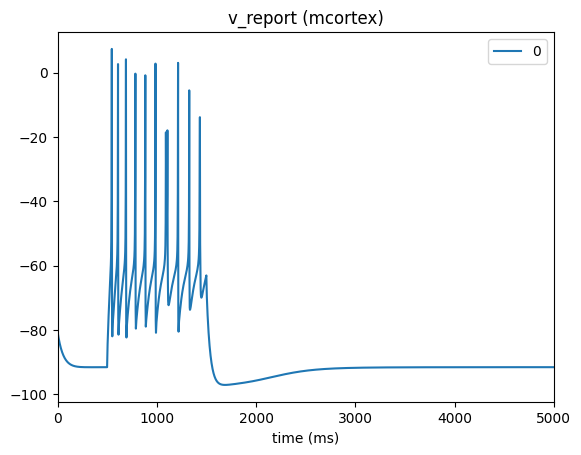

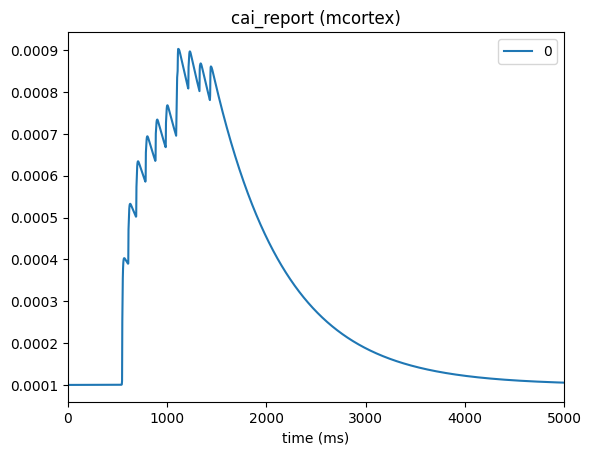

In [12]:
from bmtk.analyzer.compartment import plot_traces

# 分析数据
_ = plot_traces(config_file='sim_ch00/config.json', node_ids=[0], report_name='v_report')
_ = plot_traces(config_file='sim_ch00/config.json', node_ids=[0], report_name='cai_report')